## Introduction

Paragraph

## Importing and Cleaning Data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='darkgrid')

In [2]:
#importing csv to dataframe
df = pd.read_csv('data\kc_house_data.csv')

In [3]:
#filling the nan's with 0, all is categorical columns with the mode being 0.0
df['waterfront'] = df['waterfront'].fillna(0.0)
df['view'] = df['view'].fillna(0.0)
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

df.loc[df['sqft_basement'] == '?'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int)

In [4]:
#changing columns from float to int
col_floats = ['price', 'waterfront', 'view', 'yr_renovated']
for col in col_floats:
    df[col] = df[col].astype(int)

In [5]:
#expanding the date column to a column for each month and year
df['date'] = pd.to_datetime(df['date'])
df['month_sold'] = df['date'].dt.month
df['year_sold'] = df['date'].dt.year

In [6]:
#creating seasonal columns
df['sold_spring_time'] = df['month_sold'] < 4
df['sold_summer_time'] = (df['month_sold'] > 3) & (df['month_sold'] < 7)
df['sold_fall_time'] = (df['month_sold'] > 6) & (df['month_sold'] < 10)
df['sold_winter_time'] = (df['month_sold'] > 9) & (df['month_sold'] < 13)

df['sold_spring_time'] = df['sold_spring_time'].astype(bool).astype(int)
df['sold_summer_time'] = df['sold_summer_time'].astype(bool).astype(int)
df['sold_fall_time'] = df['sold_fall_time'].astype(bool).astype(int)
df['sold_winter_time'] = df['sold_winter_time'].astype(bool).astype(int)

In [7]:
#converting 'yr_renovated' and 'sqft_basement' into a boolean
df['has_renovated'] = df['yr_renovated'].astype(bool).astype(int)
df['has_basement'] = df['sqft_basement'].astype(bool).astype(int)

In [8]:
#deleting columns not neccesary in dataframe
df.drop('date', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [9]:
# exports a clean version of raw data.
#df.to_csv('data\Cleaned_kc_house_data.csv')

In [10]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,month_sold,year_sold,sold_spring_time,sold_summer_time,sold_fall_time,sold_winter_time,has_renovated,has_basement
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,...,1340,5650,10,2014,0,0,0,1,0,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,...,1690,7639,12,2014,0,0,0,1,1,1
2,180000,2,1.00,770,10000,1.0,0,0,3,6,...,2720,8062,2,2015,1,0,0,0,0,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,...,1360,5000,12,2014,0,0,0,1,0,1
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,...,1800,7503,2,2015,1,0,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
price               21597 non-null int32
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_living         21597 non-null int64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
waterfront          21597 non-null int32
view                21597 non-null int32
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
sqft_basement       21597 non-null int32
yr_built            21597 non-null int64
yr_renovated        21597 non-null int32
zipcode             21597 non-null int64
lat                 21597 non-null float64
long                21597 non-null float64
sqft_living15       21597 non-null int64
sqft_lot15          21597 non-null int64
month_sold          21597 non-null int64
year_sold           21597 non-null int64
sold_spring_time    21

## EDA and Scrubbing

### price

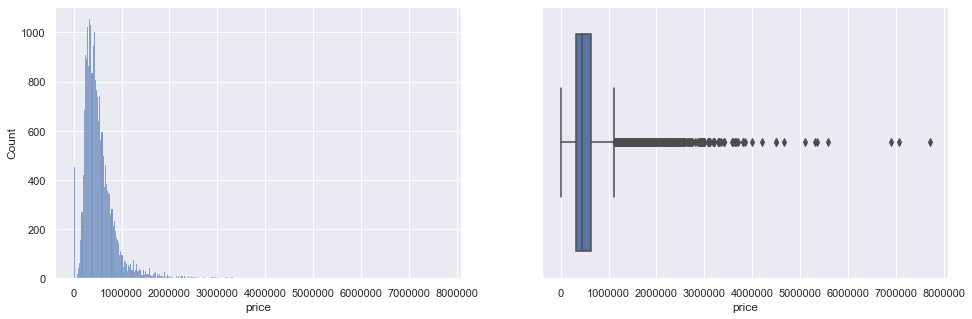

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

#looking for potential outliars
sns.histplot(data=df, x='price', ax = ax[0])
sns.boxplot(data=df, x='price', ax=ax[1]);

In [13]:
#Making the 'price' benchmark between $100000 to $900000
#df.drop(df[df['price'] > 700000].index, inplace = True)
df.drop(df[df['price'] > 710000].index, inplace = True)
df.drop(df[df['price'] < 150000].index, inplace = True)

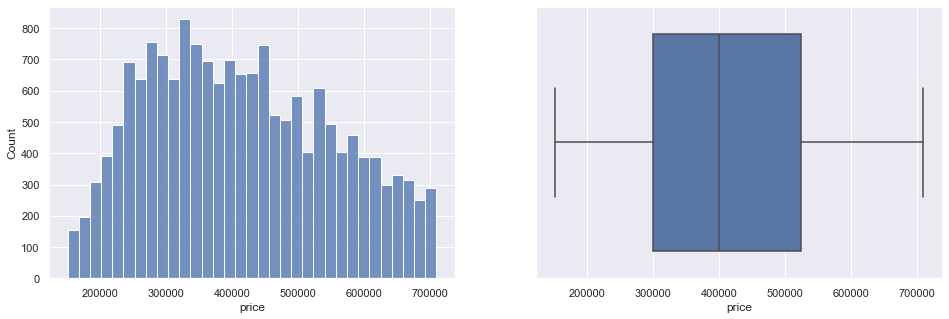

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='price', ax = ax[0])
sns.boxplot(data=df, x='price', ax=ax[1]);

>The histogram and boxplot looks to be more normally distributed after removing outliers

In [15]:
#checking the rows left
df.shape

(16858, 27)

### bedrooms

In [16]:
df['bedrooms'].value_counts()

3     8435
4     4686
2     2477
5      908
1      170
6      151
7       17
8        7
9        3
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [17]:
df.drop(df[df['bedrooms'] > 6].index, inplace = True)

In [18]:
df['bedrooms'].value_counts()

3    8435
4    4686
2    2477
5     908
1     170
6     151
Name: bedrooms, dtype: int64

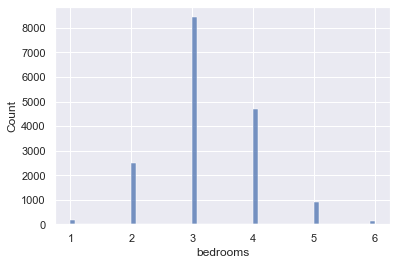

In [19]:
sns.histplot(data = df, x='bedrooms');

In [20]:
df.shape

(16827, 27)

### bathrooms

In [21]:
df['bathrooms'].value_counts()

2.50    4134
1.00    3512
1.75    2713
2.00    1696
2.25    1660
1.50    1300
2.75     738
3.00     453
3.50     257
3.25     218
0.75      62
3.75      25
4.00      20
4.50      17
1.25       7
4.25       6
5.00       3
4.75       2
0.50       2
5.25       2
Name: bathrooms, dtype: int64

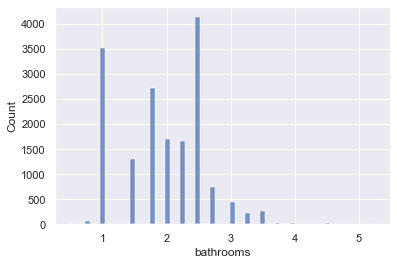

In [22]:
sns.histplot(data=df, x = 'bathrooms');

In [23]:
df.drop(df[df['bathrooms'] > 4].index, inplace = True)
df.drop(df[df['bathrooms'] < 0.75].index, inplace = True)

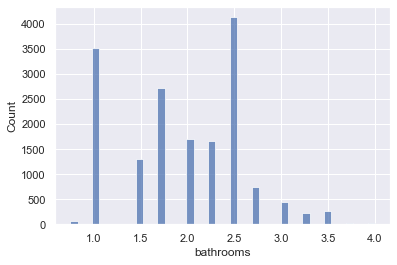

In [24]:
sns.histplot(data=df, x = 'bathrooms');

In [25]:
df.shape

(16795, 27)

### sqft_living

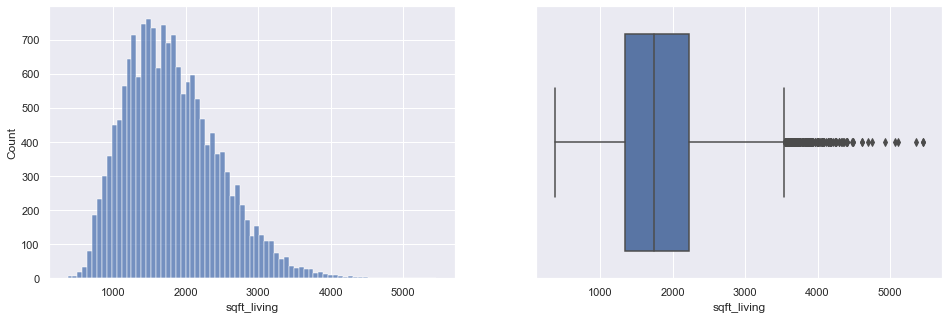

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living', ax = ax[0])
sns.boxplot(data=df, x='sqft_living', ax=ax[1]);

In [27]:
df.drop(df[df['sqft_living'] > 4500].index, inplace = True)

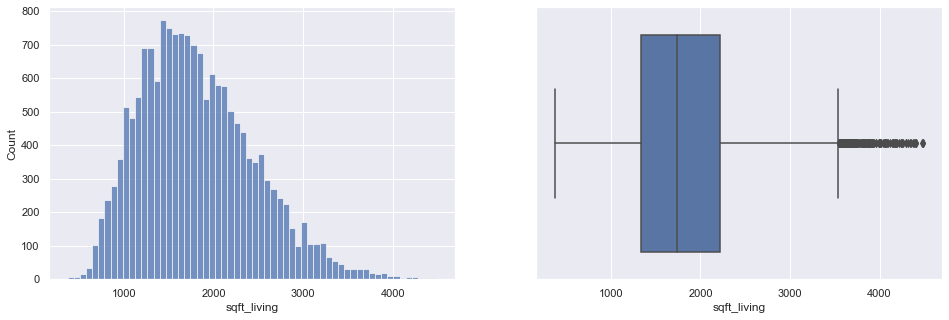

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living', ax = ax[0])
sns.boxplot(data=df, x='sqft_living', ax=ax[1]);

In [29]:
df.shape

(16785, 27)

### sqft_lot

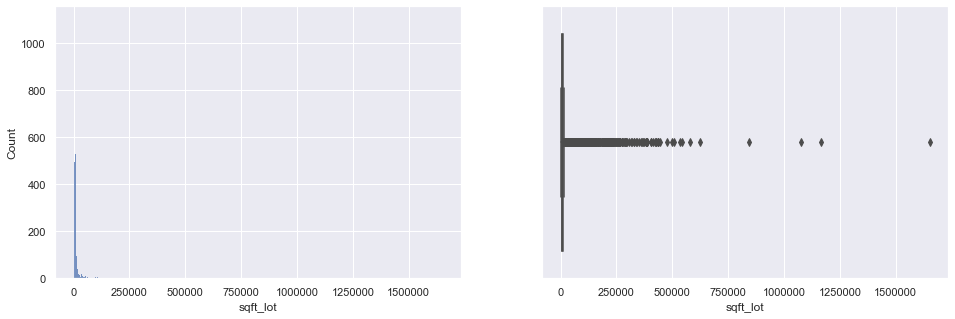

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot', ax=ax[1]);

In [31]:
#df.drop(df[df['sqft_lot'] > 17500].index, inplace = True)
df.drop(df[df['sqft_lot'] > 14000].index, inplace = True)

In [32]:
#df.drop(df[df['sqft_lot'] < 500].index, inplace = True)

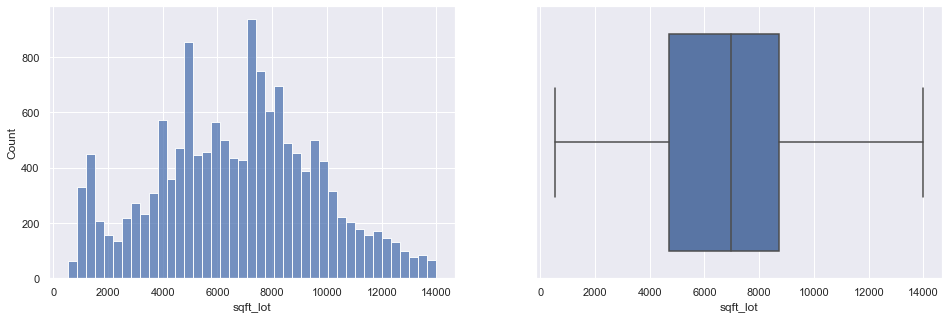

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot', ax=ax[1]);

In [34]:
df['sqft_lot'].describe()

count    14520.000000
mean      6731.364945
std       2948.908855
min        520.000000
25%       4686.500000
50%       6983.000000
75%       8720.000000
max      14000.000000
Name: sqft_lot, dtype: float64

In [35]:
df.shape

(14520, 27)

### sqft_basement

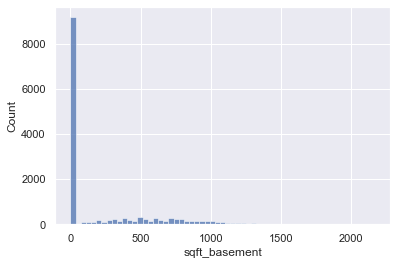

In [36]:
sns.histplot(data=df, x='sqft_basement');

In [37]:
df.drop(df[df['sqft_basement'] > 1300].index, inplace=True)

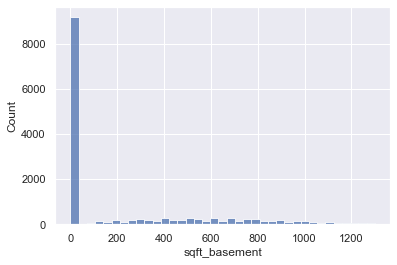

In [38]:
sns.histplot(data = df, x='sqft_basement');

#### is_basement

In [39]:
df['has_basement'].describe()

count    14385.000000
mean         0.362808
std          0.480827
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: has_basement, dtype: float64

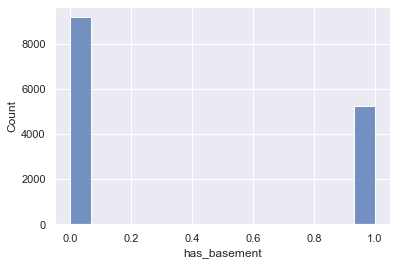

In [40]:
sns.histplot(data = df, x='has_basement');

In [41]:
df.shape

(14385, 27)

### floors

In [42]:
df['floors'].value_counts()

1.0    7794
2.0    4823
1.5    1223
3.0     481
2.5      58
3.5       6
Name: floors, dtype: int64

In [43]:
df.drop(df[df['floors'] > 3].index, inplace=True)

In [44]:
df['floors'].value_counts()

1.0    7794
2.0    4823
1.5    1223
3.0     481
2.5      58
Name: floors, dtype: int64

### grade and condition

In [45]:
df['grade'].value_counts()

7     7442
8     4094
6     1689
9      889
5      145
10     107
4       10
11       2
3        1
Name: grade, dtype: int64

In [46]:
df['condition'].value_counts()

3    9477
4    3719
5    1063
2     107
1      13
Name: condition, dtype: int64

### sqft_lot15

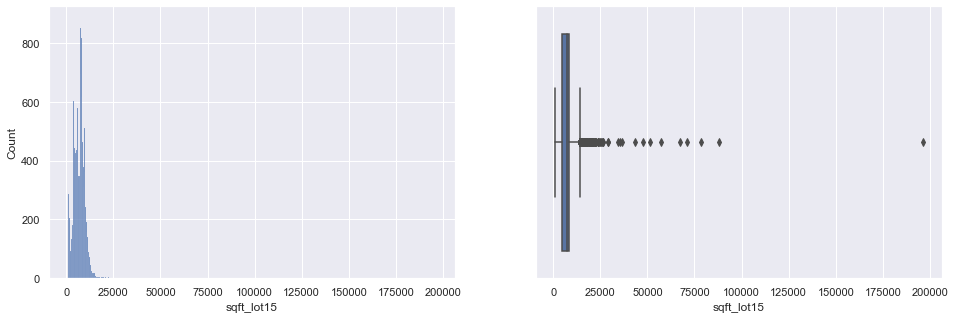

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot15', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot15', ax=ax[1]);

In [48]:
df.drop(df[df['sqft_lot15'] > 25000].index, inplace=True)

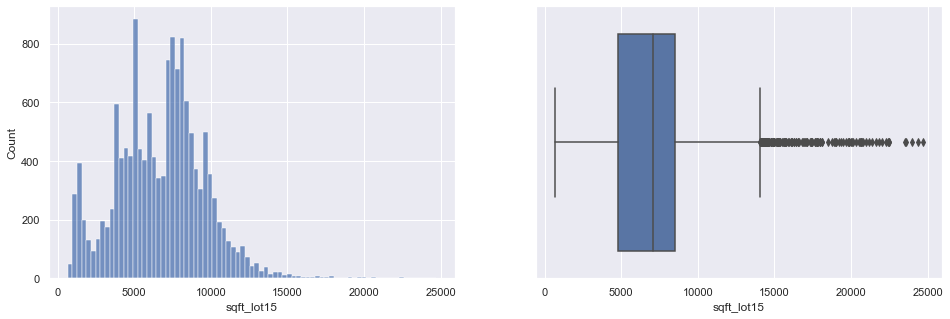

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot15', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot15', ax=ax[1]);

In [50]:
df.shape

(14361, 27)

### sqft_living15

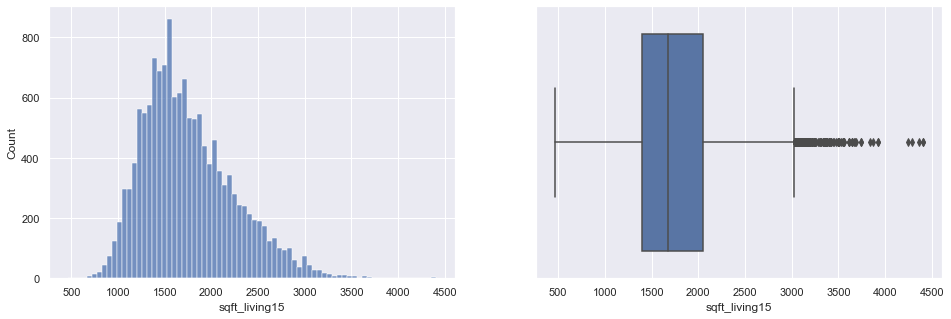

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living15', ax = ax[0])
sns.boxplot(data=df, x='sqft_living15', ax=ax[1]);

### date

In [52]:
df['year_sold'].value_counts()

2014    9682
2015    4679
Name: year_sold, dtype: int64

> deleting year_sold for not having much of a recording

In [53]:
df.drop('year_sold', axis=1, inplace=True)

### waterfront

In [54]:
df['waterfront'].value_counts()

0    14354
1        7
Name: waterfront, dtype: int64

In [55]:
df.drop('waterfront', axis=1, inplace=True)

### zipcode

C:\Users\Deric\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


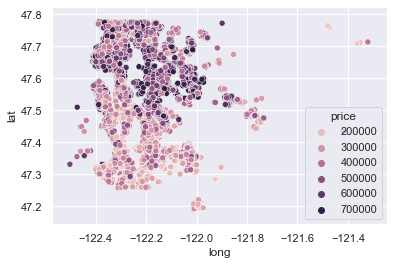

In [56]:
sns.scatterplot(df.long, df.lat, hue=df.price);

In [57]:
frequency = df.groupby('zipcode')['price'].count()
frequency

zipcode
98001    255
98002    177
98003    238
98004     26
98005     48
        ... 
98177    171
98178    221
98188    110
98198    215
98199    167
Name: price, Length: 69, dtype: int64

In [58]:
mean = df.groupby('zipcode').mean()['price']
mean

zipcode
98001    271486.043137
98002    237994.197740
98003    279574.924370
98004    630238.461538
98005    591872.312500
             ...      
98177    483843.245614
98178    289987.294118
98188    280101.045455
98198    275968.079070
98199    538573.155689
Name: price, Length: 69, dtype: float64

In [59]:
cluster = pd.concat([frequency, mean], axis=1)
cluster

,price,price
zipcode,,
98001,255,271486.043137
98002,177,237994.197740
98003,238,279574.924370
98004,26,630238.461538
98005,48,591872.312500
...,...,...
98177,171,483843.245614
98178,221,289987.294118
98188,110,280101.045455


In [60]:
cluster['zipcode'] = cluster.index

In [61]:
cluster.columns = ['frequency','price', 'zipcode']
cluster.describe()

,frequency,price,zipcode
count,69.000000,69.000000,69.000000
mean,208.130435,419129.158868,98077.855072
std,126.780138,113929.160608,56.845062
min,16.000000,237994.197740,98001.000000
25%,114.000000,305616.090909,98029.000000
50%,210.000000,423468.496815,98070.000000
75%,263.000000,512619.479070,98118.000000
max,465.000000,630858.444444,98199.000000


In [62]:
# creating "cheap" group that sell below mean price(454585)
cluster_cheap = cluster[cluster.price < 454585]

# temporary cluster of the houses that sell above mean price
cluster_temp = cluster[cluster.price >= 454585]

# creating "low volume, higher priced" group that sell less frequently than the mean
cluster_cheap_low_volume = cluster_cheap[cluster_cheap.frequency < 330]

# creating "high volume, higher priced" group that sell more frequently than the mean
cluster_cheap_high_volume = cluster_cheap[cluster_cheap.frequency >= 330]

# creating "low volume, higher priced" group that sell less frequently than the mean
cluster_expensive_low_volume = cluster_temp[cluster_temp.frequency < 278]

# creating "high volume, higher priced" group that sell more frequently than the mean
cluster_expensive_high_volume = cluster_temp[cluster_temp.frequency >= 280]

In [63]:
def get_zipcode_category(zipcode):
    if zipcode in cluster_cheap_low_volume.index:
        return 'cheap_low_volume'
    elif zipcode in cluster_cheap_high_volume.index:
        return 'cheap_high_volume'
    elif zipcode in cluster_expensive_low_volume.index:
        return 'expensive_low_volume'
    else:
        return 'expensive_high_volume'

In [64]:
df['zipcode_type'] = df.zipcode.apply(get_zipcode_category)
df.zipcode_type.value_counts() # viewing how our clusters look

cheap_low_volume         4926
cheap_high_volume        4043
expensive_low_volume     3768
expensive_high_volume    1624
Name: zipcode_type, dtype: int64

## Continuous and Categorical Features

In [65]:
# df_cont = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
# df_cate = df[['condition', 'grade', 'zipcode']]

# pd.plotting.scatter_matrix(pd.concat([df_cont, df_cate], axis=1), figsize = [12,12])
# plt.show()

### Multi-collineary 

In [66]:
df_cont = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
              'lat', 'long', 'sqft_living15', 'sqft_lot15']]

data_cont = df_cont.corr().abs().stack().reset_index().sort_values(0, ascending=False)
data_cont['pairs'] = list(zip(data_cont.level_0, data_cont.level_1))
data_cont.set_index(['pairs'], inplace=True)
data_cont.drop(columns=['level_1', 'level_0'], inplace = True)
data_cont.columns = ['cc']
data_cont.drop_duplicates(inplace=True)
data_cont[(data_cont.cc>.70) & (data_cont.cc<1)]

,cc
pairs,
"(sqft_lot, sqft_lot15)",0.866243
"(sqft_living, sqft_above)",0.829318
"(sqft_living15, sqft_living)",0.711847


>Above table are showing some highly correlated continuous columns. We'll be dropping 'sqft_above', 'sqft_living15', and 'sqft_lot15' due to high correlation that will lead to fallacy in our model.

In [67]:
#creating seperate dataframe from the original to make changes
df_b = df

In [68]:
#dropping the multicollinearies and unwanted columns
df_b.drop('lat', axis = 1, inplace = True)
df_b.drop('long', axis = 1, inplace = True)
df_b.drop('sqft_above', axis = 1, inplace = True)
df_b.drop('sqft_living15', axis = 1, inplace = True)
df_b.drop('sqft_lot15', axis = 1, inplace = True)

> We are dropping 'lat' and 'long' columns because we'll be using zipcode instead. As well as dropping the 'view' columns because we believe it's not a big determining factor for house prices.

### Categorical / One Hot Encoded

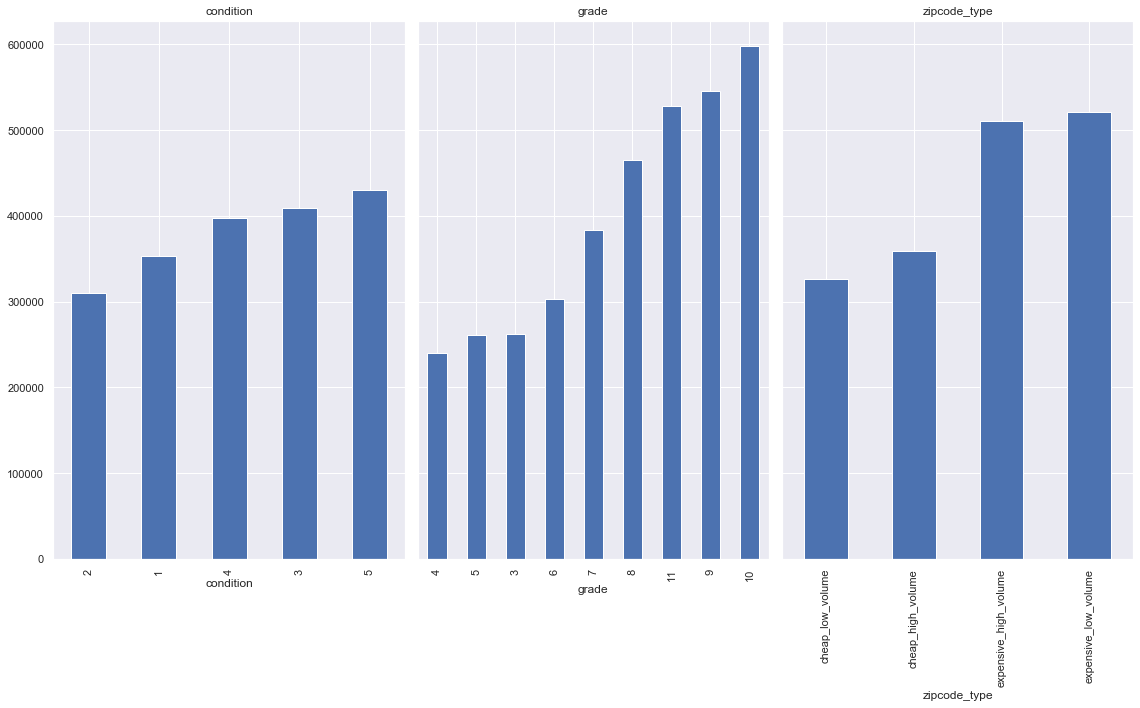

In [69]:
#looking at graphs to see columns shaped like a categorical data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,10), sharey=True)

feats = ['condition', 'grade', 'zipcode_type']

for col, ax in zip(feats, axes.flatten()):
    (df.groupby(col)               
         .mean()['price']        
         .sort_values()              
         .plot
         .bar(ax=ax))                
    
    ax.set_title(col)                
fig.tight_layout()

In [70]:
features = df[feats].astype('category')

In [71]:
feats_ohe = pd.get_dummies(features, drop_first = True)

In [72]:
feats_ohe = feats_ohe.astype(int)

In [73]:
feats_ohe.head()

,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,zipcode_type_cheap_low_volume,zipcode_type_expensive_high_volume,zipcode_type_expensive_low_volume
0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


### Baseline DataFrame

> Adding the new features to the baseline data

In [74]:
df_b = pd.concat([df_b, feats_ohe], axis = 1)

In [75]:
df_b.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'month_sold', 'sold_spring_time',
       'sold_summer_time', 'sold_fall_time', 'sold_winter_time',
       'has_renovated', 'has_basement', 'zipcode_type', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'zipcode_type_cheap_low_volume', 'zipcode_type_expensive_high_volume',
       'zipcode_type_expensive_low_volume'],
      dtype='object')

> dropping more unwanted columns from our baseline DataFrame

In [76]:
#dropping unwanted columns first
df_b.drop('view', axis = 1, inplace = True)
df_b.drop('yr_renovated', axis = 1, inplace = True)
df_b.drop('sqft_basement', axis = 1, inplace = True)

>Dropping 'condition', 'grade', and 'zipcode' since they're replaced with one hot encoded features

In [77]:
df_b.drop('condition', axis = 1, inplace = True)
df_b.drop('grade', axis = 1, inplace = True)
df_b.drop('zipcode', axis = 1, inplace = True)

In [78]:
df_b.drop('zipcode_type', axis = 1, inplace = True)

In [79]:
#checking to see the new dataset and ensuring that there is no missing values
df_b.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,month_sold,sold_spring_time,sold_summer_time,...,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,zipcode_type_cheap_low_volume,zipcode_type_expensive_high_volume,zipcode_type_expensive_low_volume
0,221900,3,1.00,1180,5650,1.0,1955,10,0,0,...,0,0,1,0,0,0,0,1,0,0
1,538000,3,2.25,2570,7242,2.0,1951,12,0,0,...,0,0,1,0,0,0,0,0,0,0
2,180000,2,1.00,770,10000,1.0,1933,2,1,0,...,0,1,0,0,0,0,0,1,0,0
3,604000,4,3.00,1960,5000,1.0,1965,12,0,0,...,0,0,1,0,0,0,0,0,0,1
4,510000,3,2.00,1680,8080,1.0,1987,2,1,0,...,0,0,0,1,0,0,0,0,0,1


In [80]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14361 entries, 0 to 21596
Data columns (total 29 columns):
price                                 14361 non-null int32
bedrooms                              14361 non-null int64
bathrooms                             14361 non-null float64
sqft_living                           14361 non-null int64
sqft_lot                              14361 non-null int64
floors                                14361 non-null float64
yr_built                              14361 non-null int64
month_sold                            14361 non-null int64
sold_spring_time                      14361 non-null int32
sold_summer_time                      14361 non-null int32
sold_fall_time                        14361 non-null int32
sold_winter_time                      14361 non-null int32
has_renovated                         14361 non-null int32
has_basement                          14361 non-null int32
condition_2                           14361 non-null int32
co

## First Model - Baseline


### Train-Test Split

In [81]:
#importing the necessary libraries for train-test split
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()

In [82]:
y = df_b[['price']]
X = df_b.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [83]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [84]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [85]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 81382.75
RMSE Test: 81428.8


###  model

In [86]:
from statsmodels.formula.api import ols

In [87]:
# Fitting the actual model
outcome = 'price'
dftrain = pd.concat([X_train, y_train], axis = 1)

predictors = '+'.join(X.columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     796.3
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:56:22   Log-Likelihood:            -1.4619e+05
No. Observations:               11488   AIC:                         2.924e+05
Df Residuals:                   11460   BIC:                         2.927e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           2.086e+06   9.19e+04     22.689      0.000    1.91e+06    2.27e+06
bedrooms                           -6277.0417   1225.832     -5.121      0.000   -8679.883   -3874.201
bathrooms                           1.139e+04   2023.084      5.628      0.000    7419.869    1.54e+04
sqft_living                           81.1039      2.262     35.856      0.000      76.670      85.538
sqft_lot                              -2.9364      0.340     -8.634      0.000      -3.603      -2.270
floors                              8681.1522   2261.055      3.839      0.000    4249.099    1.31e+04
yr_built                           -1256.0554     40.630    -30.914      0.000   -1335.698   -1176.413
month_sold                         -2359.0080    936.195     -2.520      0.012   -4194.110    -523.906
sold_spring_time                    5.154e+05   2.32e+04     22.223      0.000     4.7e+05    5.61e+05
sold_summer_time                    5.263e+05    2.3e+04     22.896      0.000    4.81e+05    5.71e+05
sold_fall_time                      5.199e+05   2.31e+04     22.473      0.000    4.75e+05    5.65e+05
sold_winter_time                    5.241e+05   2.36e+04     22.240      0.000    4.78e+05     5.7e+05
has_renovated                      -4394.5686   5191.216     -0.847      0.397   -1.46e+04    5781.103
has_basement                        1.191e+04   1896.102      6.283      0.000    8197.160    1.56e+04
condition_2                         2.574e+04   2.61e+04      0.985      0.325   -2.55e+04    7.69e+04
condition_3                         5.846e+04   2.47e+04      2.370      0.018    1.01e+04    1.07e+05
condition_4                         6.173e+04   2.47e+04      2.502      0.012    1.34e+04     1.1e+05
condition_5                         9.006e+04   2.48e+04      3.635      0.000    4.15e+04    1.39e+05
grade_4                             2680.3002   8.65e+04      0.031      0.975   -1.67e+05    1.72e+05
grade_5                            -5.877e+04    8.2e+04     -0.717      0.473   -2.19e+05    1.02e+05
grade_6                             -1.34e+04   8.16e+04     -0.164      0.870   -1.73e+05    1.47e+05
grade_7                              3.11e+04   8.16e+04      0.381      0.703   -1.29e+05    1.91e+05
grade_8                             8.012e+04   8.17e+04      0.981      0.327      -8e+04     2.4e+05
grade_9                              1.37e+05   8.18e+04      1.676      0.094   -2.32e+04    2.97e+05
grade_10                            1.611e+05   8.21e+04      1.961      0.050      47.701    3.22e+05
grade_11                            1.059e+05      1e+05      1.059      0.289   -9.01e+04    3.02e+05
zipcode_type_cheap_low_volume        -2.8e+04   1943.027    -14.408      0.000   -3.18e+04   -2.

R-squared: 0.826

Adj R-squared: 0.825

Number of significant p_values: 13

### Checking QQ Plot

In [88]:
import statsmodels.api as sm

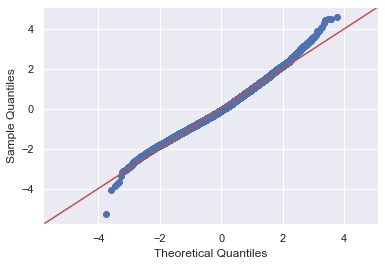

In [89]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Checking for Homoscedasticity

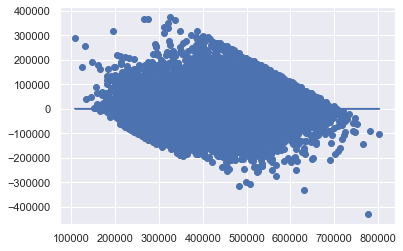

In [90]:
plt.scatter(model.predict(dftrain[X.columns]), model.resid)
plt.plot(model.predict(dftrain[X.columns]), [0 for i in range(len(dftrain))])

## Second Model - Multicollinearies

### checking and fixing multicollinearies

In [91]:
#Importing variance inflation factor to check for multicollinearies 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
col = df_b[X.columns]
vif = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]
list(zip(X.columns, vif))

[('bedrooms', 1.7823459418899419),
 ('bathrooms', 3.0290641083137673),
 ('sqft_living', 3.1783056653777786),
 ('sqft_lot', 1.7305991169740684),
 ('floors', 2.6461494839103885),
 ('yr_built', 2.5089595203209103),
 ('month_sold', 14.914925225850615),
 ('sold_spring_time', 4960.545000908538),
 ('sold_summer_time', 8008.552090800591),
 ('sold_fall_time', 7101.878149824635),
 ('sold_winter_time', 5803.060957901453),
 ('has_renovated', 1.073950086004822),
 ('has_basement', 1.4295788392844948),
 ('condition_2', 9.032448450585),
 ('condition_3', 250.2619976600087),
 ('condition_4', 213.6220359151401),
 ('condition_5', 76.9790430063947),
 ('grade_4', 11.013343656474001),
 ('grade_5', 143.86184343887695),
 ('grade_6', 1493.9701129982345),
 ('grade_7', 3596.968255769341),
 ('grade_8', 2937.648989199414),
 ('grade_9', 836.693934763113),
 ('grade_10', 107.6785725944452),
 ('grade_11', 3.010167250578652),
 ('zipcode_type_cheap_low_volume', 1.4683971785890966),
 ('zipcode_type_expensive_high_volume',

In [93]:
vif_scores = list(zip(X.columns, vif))
v_test = [x for x, vif in vif_scores if vif > 10]
print(len(vif_scores), len(v_test))

28 15


In [94]:
v_test

['month_sold',
 'sold_spring_time',
 'sold_summer_time',
 'sold_fall_time',
 'sold_winter_time',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10']

In [95]:
for v in v_test:
    dftrain.drop(v, axis=1, inplace=True)

In [96]:
dftrain.drop('condition_2', axis = 1, inplace = True)

In [97]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11488 entries, 1998 to 5485
Data columns (total 13 columns):
bedrooms                              11488 non-null int64
bathrooms                             11488 non-null float64
sqft_living                           11488 non-null int64
sqft_lot                              11488 non-null int64
floors                                11488 non-null float64
yr_built                              11488 non-null int64
has_renovated                         11488 non-null int32
has_basement                          11488 non-null int32
grade_11                              11488 non-null int32
zipcode_type_cheap_low_volume         11488 non-null int32
zipcode_type_expensive_high_volume    11488 non-null int32
zipcode_type_expensive_low_volume     11488 non-null int32
price                                 11488 non-null int32
dtypes: float64(2), int32(7), int64(4)
memory usage: 942.4 KB


### Train-Test Split

In [98]:
y = dftrain[['price']]
X = dftrain.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [99]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [100]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [101]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 86615.56
RMSE Test: 86249.23


### model

In [102]:
updf_b = dftrain.drop(['price'], axis=1)
predictors = '+'.join(updf_b.columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     1476.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:56:24   Log-Likelihood:            -1.4690e+05
No. Observations:               11488   AIC:                         2.938e+05
Df Residuals:                   11475   BIC:                         2.939e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           2.005e+06   7.54e+04     26.598      0.000    1.86e+06    2.15e+06
bedrooms                           -1.119e+04   1279.875     -8.746      0.000   -1.37e+04   -8685.536
bathrooms                           1.662e+04   2123.229      7.828      0.000    1.25e+04    2.08e+04
sqft_living                          111.9687      2.195     51.014      0.000     107.666     116.271
sqft_lot                              -2.5764      0.358     -7.193      0.000      -3.279      -1.874
floors                              1.602e+04   2373.628      6.751      0.000    1.14e+04    2.07e+04
yr_built                            -935.6939     39.233    -23.850      0.000   -1012.596    -858.791
has_renovated                      -5855.1541   5466.413     -1.071      0.284   -1.66e+04    4859.948
has_basement                        9661.5333   1992.235      4.850      0.000    5756.413    1.36e+04
grade_11                           -1.221e+04   6.13e+04     -0.199      0.842   -1.32e+05    1.08e+05
zipcode_type_cheap_low_volume      -3.092e+04   2057.769    -15.024      0.000   -3.49e+04   -2.69e+04
zipcode_type_expensive_high_volume  1.466e+05   3002.494     48.838      0.000    1.41e+05    1.53e+05
zipcode_type_expensive_low_volume    1.46e+05   2248.098     64.964      0.000    1.42e+05     1.5e+05
==============================================================================
Omnibus:                      274.635   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.182
Skew:                           0.359   Prob(JB):                     1.46e-66
Kurtosis:                       3.343   Cond. No.                     7.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### QQ Plot

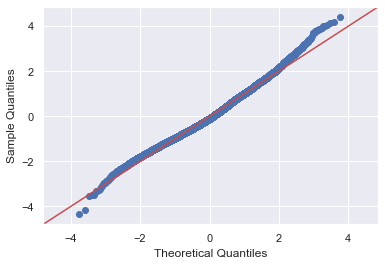

In [103]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Homoscedasticity

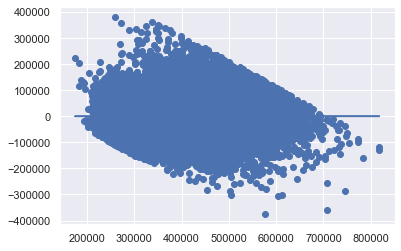

In [104]:
plt.scatter(model.predict(dftrain[updf_b.columns]), model.resid)
plt.plot(model.predict(dftrain[updf_b.columns]), [0 for i in range(len(dftrain))]);

## Third Model - P_Values

### finding and fixing high p_values

In [105]:
# finding the high p values
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)

In [106]:
#showing the high p values
high_p_values = list(p_table[p_table['P>|t|'] >= 0.05].index)
print("Our high p_values columns:", high_p_values)

Our high p_values columns: ['has_renovated', 'grade_11']


In [107]:
# leaving the high p values out.
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')

### Train-Test Split

In [108]:
y = dftrain[['price']]
X = dftrain[x_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [109]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [110]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [111]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 86616.27
RMSE Test: 86260.55


### model

In [112]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     1771.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:56:25   Log-Likelihood:            -1.4690e+05
No. Observations:               11488   AIC:                         2.938e+05
Df Residuals:                   11477   BIC:                         2.939e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1.986e+06   7.33e+04     27.097      0.000    1.84e+06    2.13e+06
bedrooms                           -1.115e+04   1279.133     -8.716      0.000   -1.37e+04   -8641.445
bathrooms                           1.642e+04   2114.840      7.765      0.000    1.23e+04    2.06e+04
sqft_living                          111.9262      2.193     51.030      0.000     107.627     116.226
sqft_lot                              -2.5744      0.358     -7.189      0.000      -3.276      -1.872
floors                               1.59e+04   2370.954      6.707      0.000    1.13e+04    2.06e+04
yr_built                            -925.9454     38.168    -24.259      0.000   -1000.762    -851.129
has_basement                        9725.5241   1991.254      4.884      0.000    5822.326    1.36e+04
zipcode_type_cheap_low_volume      -3.094e+04   2057.567    -15.037      0.000    -3.5e+04   -2.69e+04
zipcode_type_expensive_high_volume  1.467e+05   3001.304     48.886      0.000    1.41e+05    1.53e+05
zipcode_type_expensive_low_volume    1.46e+05   2247.964     64.968      0.000    1.42e+05     1.5e+05
==============================================================================
Omnibus:                      274.583   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.183
Skew:                           0.359   Prob(JB):                     1.46e-66
Kurtosis:                       3.344   Cond. No.                     7.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### QQ plot

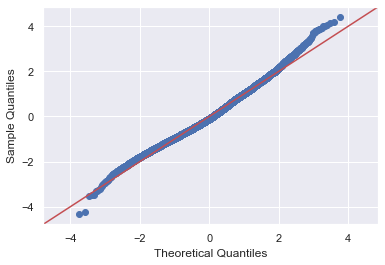

In [113]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Homoscedasiticity

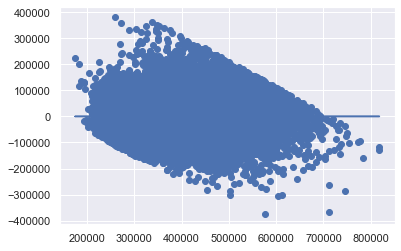

In [114]:
plt.scatter(model.predict(dftrain[x_cols]), model.resid)
plt.plot(model.predict(dftrain[x_cols]), [0 for i in range(len(dftrain))]);

## Fourth Model  - Transformation

### adding log values to 'continuous' columns

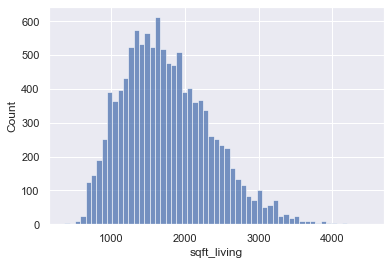

In [115]:
cont = ['sqft_living','sqft_lot']

sns.histplot(data = dftrain, x = 'sqft_living');

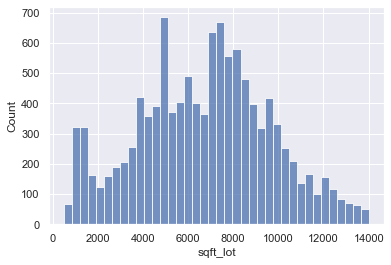

In [116]:
sns.histplot(data = dftrain, x = 'sqft_lot');

In [117]:
dfcont = dftrain[cont]
log_names = [f'{column}_log' for column in dfcont.columns]

df_log = np.log(dfcont)
df_log.columns = log_names

for col in df_log:
    dftrain[col] = df_log[col]

In [118]:
dftrain

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,has_renovated,has_basement,grade_11,zipcode_type_cheap_low_volume,zipcode_type_expensive_high_volume,zipcode_type_expensive_low_volume,price,sqft_living_log,sqft_lot_log
1998,2,1.00,1010,3400,1.0,1921,0,0,0,0,1,0,470450,6.917706,8.131531
3901,3,2.25,2180,6850,1.0,1973,0,1,0,0,0,0,455000,7.687080,8.832004
16960,3,2.50,2040,4627,2.0,1992,0,0,0,0,1,0,580000,7.620705,8.439664
1968,4,2.00,1770,8890,1.0,1949,0,0,0,1,0,0,355000,7.478735,9.092682
824,3,1.00,1810,7200,1.0,1954,0,1,0,0,0,0,431000,7.501082,8.881836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,3,1.75,1660,8303,1.0,1974,0,1,0,0,0,0,279950,7.414573,9.024372
18551,3,1.00,1220,6719,1.0,1953,0,0,0,1,0,0,196000,7.106606,8.812695
2034,3,2.00,2520,5980,1.0,1957,0,1,0,0,0,1,650000,7.832014,8.696176
17642,3,2.50,3040,7880,2.0,2004,0,0,0,0,0,0,598555,8.019613,8.972083


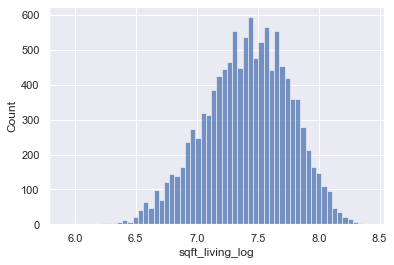

In [119]:
sns.histplot(data = dftrain, x = 'sqft_living_log');

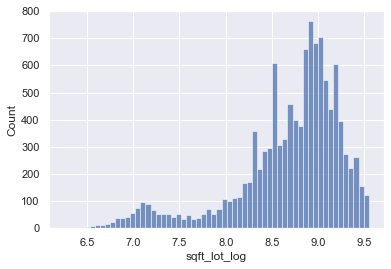

In [120]:
sns.histplot(data = dftrain, x = 'sqft_lot_log');

In [121]:
x_cols.remove('sqft_living')
#x_cols.remove('sqft_lot')

x_cols.append('sqft_living_log')
#x_cols.append('sqft_lot_log')

### Train-Test Split

In [122]:
y = dftrain[['price']]
X = dftrain[x_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [123]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [124]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [125]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

RMSE Train: 87393.12
RMSE Test: 86916.52


### model

In [126]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     1721.
Date:                Sat, 21 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:56:26   Log-Likelihood:            -1.4700e+05
No. Observations:               11488   AIC:                         2.940e+05
Df Residuals:                   11477   BIC:                         2.941e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           7.992e+05   7.78e+04     10.278      0.000    6.47e+05    9.52e+05
bedrooms                           -1.271e+04   1312.660     -9.680      0.000   -1.53e+04   -1.01e+04
bathrooms                           1.543e+04   2157.218      7.152      0.000    1.12e+04    1.97e+04
sqft_lot                              -2.6952      0.363     -7.416      0.000      -3.408      -1.983
floors                              1.528e+04   2398.054      6.370      0.000    1.06e+04       2e+04
yr_built                            -952.3239     38.499    -24.736      0.000   -1027.788    -876.860
has_basement                        3649.7461   2040.736      1.788      0.074    -350.445    7649.937
zipcode_type_cheap_low_volume      -3.045e+04   2075.634    -14.671      0.000   -3.45e+04   -2.64e+04
zipcode_type_expensive_high_volume  1.458e+05   3027.421     48.176      0.000     1.4e+05    1.52e+05
zipcode_type_expensive_low_volume   1.455e+05   2268.153     64.148      0.000    1.41e+05     1.5e+05
sqft_living_log                     1.951e+05   4014.783     48.600      0.000    1.87e+05    2.03e+05
==============================================================================
Omnibus:                      263.142   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.677
Skew:                           0.362   Prob(JB):                     1.52e-62
Kurtosis:                       3.267   Cond. No.                     7.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### QQ Plot

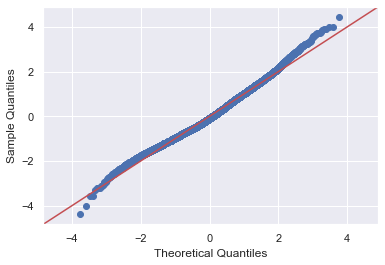

In [127]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

###  Homoscedasiticity

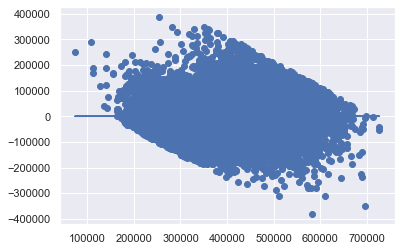

In [128]:
plt.scatter(model.predict(dftrain[x_cols]), model.resid)
plt.plot(model.predict(dftrain[x_cols]), [0 for i in range(len(dftrain))]);

## TEST (will delete later)

In [129]:
dftrain['waterfront'].value_counts()

KeyError: 'waterfront'

In [ ]:
df.drop('waterfront', axis=1, inplace=True)
x_cols.remove('waterfront')


In [ ]:
y = dftrain[['price']]
X = dftrain[x_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [ ]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [ ]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

In [ ]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### creating interactions

In [ ]:
dftrain['bed_bath_interaction'] = dftrain['bedrooms'] * dftrain['bathrooms']

In [ ]:
df.drop('bedrooms', axis=1, inplace=True)
df.drop('bathrooms', axis=1, inplace=True)

In [ ]:
x_cols.remove('bedrooms')
x_cols.remove('bathrooms')

x_cols.append('bed_bath_interaction')

In [ ]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### logging more

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=dftrain, x='yr_built', ax = ax[0])
sns.boxplot(data=dftrain, x='yr_built', ax=ax[1]);

In [ ]:
cont = ['yr_built']

In [ ]:
dftrain['yr_built_log'] = np.log(dftrain['yr_built'])

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=dftrain, x='yr_built_log', ax = ax[0])
sns.boxplot(data=dftrain, x='yr_built_log', ax=ax[1]);

In [ ]:
x_cols.remove('yr_built')
x_cols.append('yr_built_log')

In [ ]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### ohe ideas

In [ ]:
dftrain

In [ ]:
cate = ['bedrooms', 'bathrooms', 'floors']

features = df[cate].astype('category')
feats_ohe = pd.get_dummies(features, drop_first = True)
feats_ohe = feats_ohe.astype(int)

feats_ohe.columns = [c.replace('.', '_') for c in feats_ohe.columns]

In [ ]:
feats_ohe.info()

In [ ]:
df_test = pd.concat([dftrain, feats_ohe], axis=1)

In [ ]:
df_test = df_test.dropna() 

In [ ]:
df_test.drop('bedrooms', axis=1, inplace=True)
df_test.drop('bathrooms', axis=1, inplace=True)
df_test.drop('floors', axis=1, inplace=True)

In [ ]:
x_cols.extend(list(feats_ohe.columns))

In [ ]:
x_cols.remove('bedrooms')
x_cols.remove('bathrooms')
x_cols.remove('floors')

In [ ]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = df_test).fit()
model.summary()

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

> might keep floors as ohe and normalize bedrooms and bathrooms